# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 8 апреля 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 8 апреля, -4 балла после 06:00 15 апреля, -6 баллов после 06:00 22 апреля  -8 баллов после 06:00 29 апреля.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [838]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



*** Что почитать по теории ***

Одна из лучших книг по ML $-$ "Pattern Recognition and Machine Learning" Bishop, Christopher. 

Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

$$Q(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] $$


$$ w_{new} = w_{old} - \alpha\bigtriangledown L(w) $$

$$ w_{new} = w_{old} - \alpha(\bigtriangledown Q(w) +\frac{1}{C}2w_{old})$$

$$ w_{new} = w_{old}(1 - \frac{2\alpha}{C}) - \alpha \frac{2}{N} \sum_i x_i (x_i w - y_i)  $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

***Ваше решение здесь***

Аналогично предыдущему пункту:

$$L(w) =  \frac{1}{N}\left[\sum_i \log (1 + e^{-XwY}) \right] + \frac{1}{C}R(w) $$

$$Q(w) =  \frac{1}{N}\left[\sum_i \log (1 + e^{-XwY}) \right] $$


$$ w_{new} = w_{old} - \alpha\bigtriangledown L(w) $$

$$ w_{new} = w_{old} - \alpha(\bigtriangledown Q(w) - \frac{1}{C}2w_{old})$$

$$ w_{new} = w_{old}(1 - \frac{2\alpha}{C}) - \alpha\bigtriangledown Q(w) $$

$$ w_{new} = w_{old}(1 - \frac{2\alpha}{C}) - \alpha \frac{1}{N} \sum_i x_i( \sigma (x_i w) - y_i) $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией

***Ваше решение здесь***

==============================================================================================================
На занятии мы убедились, что при $w = (X^TX)^{-1}X^TY $ градиент равняется нулю, но это может означать как то, что мы нашли точку минимума, так и то, что мы нашли точку максимума, для того чтобы показать, что мы действительно нашли минимум необходимо найти направление выпуклости функции, для чего следует найти ее вторую производную Гессиан и показать, что он положительно определен.  

$$L(w) =  \frac{1}{N}(Xw - Y)(Xw - Y)^T$$
По показанному на занятии:
$$\bigtriangledown L(w) = 2X^TXw - 2X^TY$$
Тогда:
$$H(L) = 2X^TX$$ 
Получилась матрица n на n, где n число переменных(число столбцов), также эта матрица эрмитова т.к. матрицы вещественные:
$$(2X^TX)^T = 2X^TX$$
Также матрица имеет полный ранг и раз число строк не меньше числа столбцов этот ранг равен n, и значит матрица A инъективна и значит положительноопределена.

==================================================================================================================

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

$$Q(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] $$

$$\bigtriangledown L(w) =  \bigtriangledown Q(w) + \bigtriangledown(\frac{1}{C}R(w)) $$

$$\bigtriangledown L(w) =  \bigtriangledown Q(w) + \bigtriangledown(\frac{1}{C}w^Tw) $$

$$\bigtriangledown L(w) = 2X^TXw - 2X^TY + \frac{1}{C}w$$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$

$$p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1 => p(y_i = 0 | x_i) = 1 - p(y_i = 1 | x_i)$$ 

$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - (1 - p(y_i = 1 | x_i)) \log( 1 - a(x_i))$$

$$ p = p(y_i = 1 |x_i ) и a = a(x_i)$$

$$E(L | x_i) = p \log( \frac{1 - a}{a}) - \log( 1 - a)$$

$$ \frac{\partial E(L | x_i)}{\partial a} = -\frac{p - a}{(1 - a)a}$$

Данное выражение оьращается в ноль при $a(x_i) = p(y_i = 1 |x_i )$ значит эта точка является точкой экстренума при этом при $a < p$ выражение $-\frac{p - a}{(1 - a)a} < 0$, т.к. $a < 1, a > 0$(необходимое условие существования логарифмов $\log( 1 - a)$ и $\log(a)$), а при $a > p$ выражение $-\frac{p - a}{(1 - a)a} > 0$. Значит минимум достигается в точке $a = p(y_i = 1 |x_i )$    ч.т.д.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [3]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [4]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [5]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [6]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [520]:
def batch_generator(X, y, shuffle=True, batch_size=1, butch_n = 1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y          - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    matrix = np.concatenate((X, y.reshape(y.shape[0], -1)), axis=1)
    if shuffle:
        np.random.seed(1)
        np.random.shuffle(matrix)
        
    for i in range(int(X.shape[0]/batch_size)):
        X_batch = matrix[i * batch_size:(i + 1) * batch_size:, :-1:]
        y_batch = matrix[i * batch_size:(i + 1) * batch_size:, -1]
        yield (X_batch, y_batch)
    
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [1112]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x = 1. / (1. + np.exp(-np.float32(x)))
    
    ## Your code Here
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, batch_size=1, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.batch_size = batch_size
        self.errors_log = {'iter' : [], 'loss' : []} 
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        X = np.asmatrix(X_batch)
        Y = np.asmatrix(y_batch)
        
        if self.model_type == 'log_reg':
            Y = np.asarray(Y)
            sigm_v = np.vectorize(sigmoid)
            a = np.asarray(sigm_v(X * self.weights.T))
            loss_ = (1 - Y) * np.log(1 - a)
            loss = -(Y * np.log(a) + loss_)
            loss = np.sum(loss)
            loss /= Y.shape[0]
            loss += np.sum(np.asarray(self.weights) ** 2) / self.C
            return loss
        
        scalar = np.asarray(X * self.weights.T - Y.T)
        loss = np.sum(scalar**2)    
        loss /= Y.shape[0]
        loss += np.sum(np.asarray(self.weights) ** 2) / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        X = np.asmatrix(X_batch)
        Y = np.asmatrix(y_batch)
                
        if self.model_type == 'log_reg':
            sigm_v = np.vectorize(sigmoid)
            sigm = sigm_v(X * self.weights.T) - Y.T
            loss_grad = sigm.T * X / self.batch_size
            loss_grad += 2 * self.weights / self.C
            return loss_grad.T
        
        loss_grad = 2 * (X.T * X * self.weights.T - X.T * Y.T) / self.batch_size
        loss_grad += (2 * self.weights / self.C).T
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        
        self.weights -= self.alpha * new_grad.T
        
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        X = np.concatenate((X, np.ones(y.shape[0]).reshape(y.shape[0], -1)), axis=1)
        # Нужно инициализровать случайно веса
        self.weights = np.asmatrix(np.random.random_sample(size=X.shape[1]))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size, shuffle=True)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss) 
            #self.alpha /= 2
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.concatenate((X, np.ones(X.shape[0]).reshape(X.shape[0], -1)), axis=1)
        y_pred = np.asmatrix(X) * self.weights.T
        
        y_hat = np.zeros(y_pred.shape)
        
        for i in range(y_pred.shape[0]):
            if y_pred[i] > 0.5:
                y_hat[i] = 1
            
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [1113]:
def plot_decision_boundary(clf, col = 'r'):
    # разделяющая плоскость на классы 1 и 0 должна проходить по середине т.е. w0 + w1*x1 + w2*x2 = 1/2 => 
    # x2 = (-w1/w2)x1 + (1/2 - w0)/w2 
    coeff = clf.weights.tolist()[0]
    k = -coeff[0] / coeff[1];
    b = (0.5 - coeff[2]) / coeff[1];
    x1 = -4
    x2 = 8
    plt.plot([x1, x2], [x1 * k + b, x2 * k + b], 'k-', color = col)
    pass

[[ 0.11471474 -0.11293435  0.00880426]] lir 0.12452420994209035
[[ 0.54358117 -0.50481892 -2.42093367]] lor 0.40511536063832454


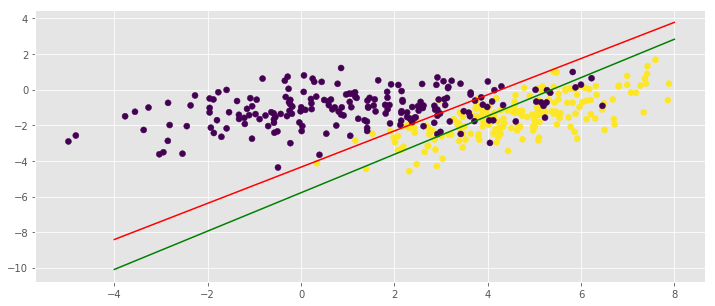

In [1114]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
#print(X.shape, y.shape)

#\\\\\\\\\\\\\\\\\\\

lir = MySGDClassifier(batch_generator)
lir.fit(X, y)
print(lir.weights, "lir", lir.errors_log['loss'][-1])
lor = MySGDClassifier(batch_generator, model_type='log_reg', C=1000)
lor.fit(X, y)
print(lor.weights, "lor", lor.errors_log['loss'][-1])

#\\\\\\\\\\\\\\\\\\\\\\\\\\

plot_decision_boundary(lir, 'r')
plot_decision_boundary(lor, 'g')

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [938]:
from sklearn.datasets import make_classification

In [939]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

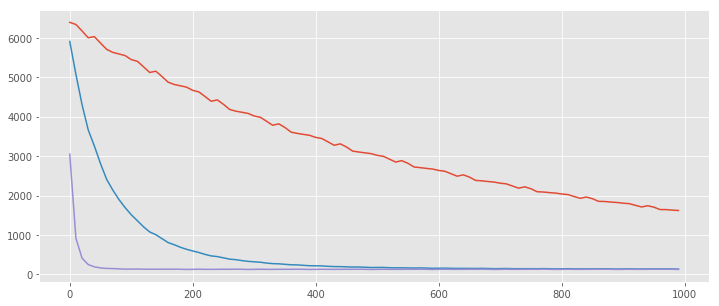

Wall time: 30.9 s


In [932]:
%%time
N = 10
alpha = [0.0001, 0.001, 0.01]
for j in alpha:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=1000, max_epoch = 10, alpha=j,model_type='lin_reg')
    lr.fit(X, y)
    n = range(0, len(lr.errors_log['loss']), N)
    plt.plot(n, [np.mean(lr.errors_log['loss'][i:i + N]) for i in n])
plt.show()

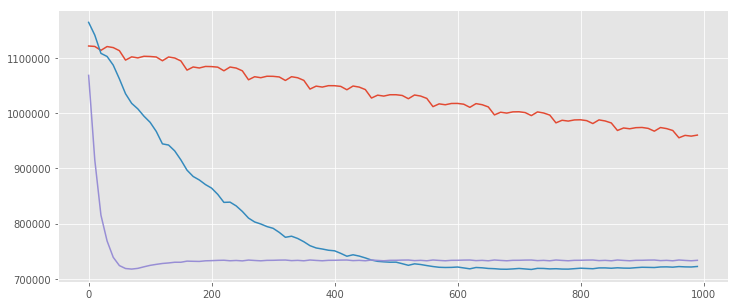

Wall time: 16min 52s


In [940]:
%%time
N = 10
alpha = [0.0001, 0.001, 0.01]
for j in alpha:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=1000, max_epoch = 10, alpha=j,model_type='log_reg')
    lr.fit(X, y)
    n = range(0, len(lr.errors_log['loss']), N)
    plt.plot(n, [np.mean(lr.errors_log['loss'][i:i + N]) for i in n])
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [945]:
C = np.logspace(3, -3, 10)
C

array([1.00000000e+03, 2.15443469e+02, 4.64158883e+01, 1.00000000e+01,
       2.15443469e+00, 4.64158883e-01, 1.00000000e-01, 2.15443469e-02,
       4.64158883e-03, 1.00000000e-03])

[0.34250547 0.34238184 0.34203803 0.34108301 0.33843837 0.33117738
 0.31171286 0.26290494 0.16145486 0.03752062]


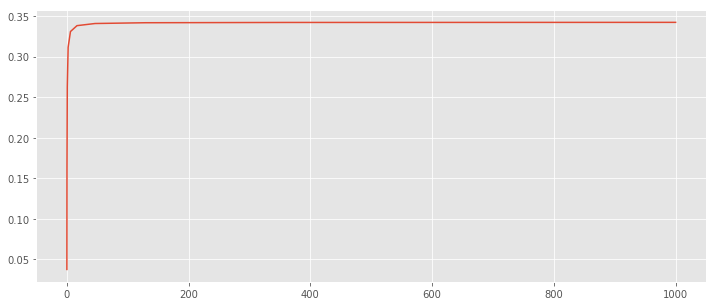

Wall time: 1min 46s


In [951]:
%%time
C = np.logspace(3, -1, 10)
w1 = np.zeros(shape=(0,0))
for j in C:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=100000, max_epoch=10, C=j, model_type='lin_reg')
    lr.fit(X, y)
    w1 = np.append(w1, np.mean(lr.weights))
plt.plot(C, w1)
print(w1)
plt.show()

[ 0.31819708  0.31693421  0.31344592  0.30393591  0.27893302  0.21944932
  0.11125639  0.01141299 -0.00535915 -0.00218818]


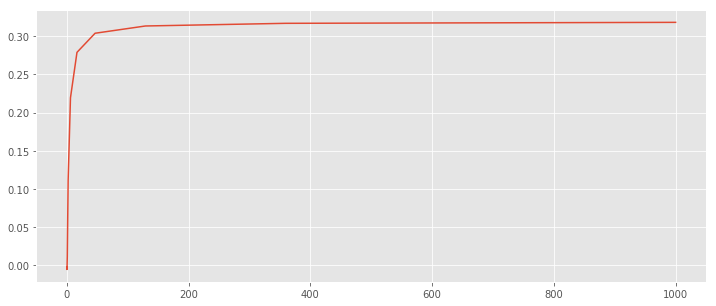

Wall time: 3min 17s


In [961]:
%%time
C = np.logspace(3, -1, 10)
w1 = np.zeros(shape=(0,0))
for j in C:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=1000, max_epoch=1, C=j, model_type='log_reg')
    lr.fit(X, y)
    w1 = np.append(w1, np.mean(lr.weights))
    #print("j")
plt.plot(C, w1)
print(w1)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview-2.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [1013]:
import csv
import shutil
import sys
doc_to_title = {}
with open('G:\\programs\\kg\\anomaly-detection-competition-ml1-ts-spring-2019\\docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print(len(doc_to_title))

28026


In [1014]:
import pandas as pd
train_data = pd.read_csv('G:\\programs\\kg\\anomaly-detection-competition-ml1-ts-spring-2019\\train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [1034]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [1016]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [1017]:
gen = [i for i in np.concatenate((X_train, y_train.reshape(y_train.shape[0], -1)), axis=1) if i[-1] == 0]


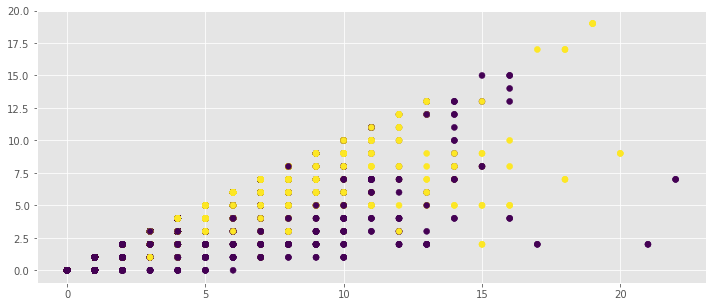

array([[4, 4, 3, ..., 2, 1, 1],
       [8, 7, 7, ..., 2, 2, 2],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [6, 2, 1, ..., 1, 1, 1],
       [3, 2, 2, ..., 1, 1, 1]])

In [1018]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()
X_train

In [1027]:
import time
batch_size = [1, 10, 100, 1000, 10000]
for i in batch_size:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=i, model_type='lin_reg')
    start = time.time()
    lr.fit(X_train, y_train)
    curent_time = time.time()
    print(curent_time - start)

C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in square
C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in double_scalars
C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in square
C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in subtract


187.41212797164917
13.52771782875061
2.9600040912628174
1.9473364353179932
2.02449107170105


In [1030]:
batch_size = [1, 10, 100, 1000, 10000]
for i in batch_size:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=i, model_type='log_reg')
    start = time.time()
    lr.fit(X_train, y_train)
    curent_time = time.time()
    print(curent_time - start)

193.10725808143616
36.1955292224884


C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


6.015280246734619
31.764052152633667
246.88578820228577


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [1035]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)
print(y_train.shape, X_train.shape)

(10521,) (10521, 15)


In [1045]:
import scipy
C = [1, 10, 100, 1000, 10000]
for i in C:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=10, C=i, model_type='lin_reg')
    start = time.time()
    lr.fit(X_train, y_train)
    curent_time = time.time()
    print(scipy.spatial.distance.cityblock(lr.predict(X_test), y_test)/(y_test.shape[0]), 'C =', i)

0.28999144568006846 C = 1
0.2865697177074423 C = 10
0.2985457656116339 C = 100
0.28999144568006846 C = 1000
0.290846877673225 C = 10000


In [1047]:
for i in C:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=10, C=i, model_type='log_reg')
    start = time.time()
    lr.fit(X_train, y_train)
    curent_time = time.time()
    print(scipy.spatial.distance.cityblock(lr.predict(X_test), y_test)/(y_test.shape[0]), 'C =', i)

0.2840034217279726 C = 1
0.22840034217279725 C = 10
0.21813515825491872 C = 100
0.21129170230966637 C = 1000
0.21043627031650983 C = 10000


In [1050]:
max_e = [10, 50, 100]
for i in max_e:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=10, max_epoch=i, model_type='lin_reg')
    start = time.time()
    lr.fit(X_train, y_train)
    curent_time = time.time()
    print(scipy.spatial.distance.cityblock(lr.predict(X_test), y_test)/(y_test.shape[0]), 'epoch =', i)

0.28999144568006846 epoch = 10
0.28999144568006846 epoch = 50
0.28999144568006846 epoch = 100


In [1051]:
for i in max_e:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=10, C=10000, max_epoch=i, model_type='log_reg')
    start = time.time()
    lr.fit(X_train, y_train)
    curent_time = time.time()
    print(scipy.spatial.distance.cityblock(lr.predict(X_test), y_test)/(y_test.shape[0]), 'epoch =', i)

0.21043627031650983 epoch = 10
0.20958083832335328 epoch = 50
0.21043627031650983 epoch = 100


In [1052]:
alpha = [0.1, 0.01, 0.001, 0.0001]
for i in alpha:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=10, alpha=i, model_type='lin_reg')
    start = time.time()
    lr.fit(X_train, y_train)
    curent_time = time.time()
    print(scipy.spatial.distance.cityblock(lr.predict(X_test), y_test)/(y_test.shape[0]), 'alpha =', i)

C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in square
C:\Users\nikol\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in square
C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in subtract
C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:129: RuntimeWarning: invalid value encountered in greater


0.2874251497005988 alpha = 0.1
0.28999144568006846 alpha = 0.01
0.20786997433704021 alpha = 0.001
0.20958083832335328 alpha = 0.0001


In [1053]:
alpha = [0.1, 0.01, 0.001, 0.0001]
for i in alpha:
    lr = MySGDClassifier(batch_generator=batch_generator, batch_size=10, C=10000, max_epoch=10, alpha=i, model_type='log_reg')
    start = time.time()
    lr.fit(X_train, y_train)
    curent_time = time.time()
    print(scipy.spatial.distance.cityblock(lr.predict(X_test), y_test)/(y_test.shape[0]), 'alpha =', i)

0.2600513259195894 alpha = 0.1
0.21043627031650983 alpha = 0.01


C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
C:\Users\nikol\Anaconda\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply


0.2249786142001711 alpha = 0.001
0.31736526946107785 alpha = 0.0001


In [1054]:
#optimal lin reg param: C = 10, alpha = 0.001, max_e = 10
#optimal log reg param: C = 10000, alpha = 0.01, max_e = 50

In [1055]:
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [1077]:
import pandas as pd
test_data = pd.read_csv('G:\\programs\\kg\\anomaly-detection-competition-ml1-ts-spring-2019\\test_groups.csv')
test_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_pair = new_doc['pair_id']
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in test_titledata:
        test_titledata[doc_group] = []
    test_titledata[doc_group].append((doc_id, title, doc_pair))

In [1081]:
X_test = []
pair = []
groups_test = []
for new_group in test_titledata:
    docs = test_titledata[new_group]
    for k, (doc_id, title, doc_pair) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
        pair.append(doc_pair)
X_test = np.array(X_test)
groups_test = np.array(groups_test)
pair = np.array(pair)
print (X_test.shape, groups_test.shape, pair.shape)

(16627, 15) (16627,) (16627,)


In [1105]:
lr = MySGDClassifier(batch_generator=batch_generator, batch_size=10, C=10, alpha=0.01, max_epoch=10, model_type='lin_reg')
lr.fit(X_train, y_train)
ans = lr.predict(X_test)

In [1106]:
ans = np.concatenate((pair.reshape(pair.shape[0], -1), ans.reshape(pair.shape[0], -1)), axis=1)
ans

array([[1.1691e+04, 1.0000e+00],
       [1.1692e+04, 1.0000e+00],
       [1.1693e+04, 1.0000e+00],
       ...,
       [2.8315e+04, 1.0000e+00],
       [2.8316e+04, 1.0000e+00],
       [2.8317e+04, 1.0000e+00]])

In [1107]:
ans = pd.DataFrame(data=ans, dtype=int)
ans.columns = ['pair_id', 'target']

In [1108]:
ans.to_csv('answer_linreg.csv', sep=',', encoding='utf-8', index=False)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна. Если да, то Вы молодец!

# Контрольные вопросы
Постарайтесь максимально развернуто и честно ответить на вопросы. Они охватывают тему линейных моделей и скорее нужны преподавателям, чтобы понимать, что именно Вы усвоили плохо. Надеюсь, они подскажут, что именно в теме Вы не понимаете или наоборот порадают, что Вы все знаете ^_^

* Опишите основные, на Ваш взгляд,  отличия логистической регрессии от линейной регрессии. Почему, на ваш взгляд, задачу классификации решают логистической, а не линейной регрессией?


***Ваше ответ здесь***

За счет сигмоиды в логистической регрессии мы получаем число от 0 до 1, что легче расценивать как вероятность, чем "необработанный" выход линейной регресии. Также из-за гладкости функции потерь лог.регрессии не должно быть скачков, когда на похожих данных получается разный ответ.

* Как Вы думаете, для каких типов задач (объем данных, число признаков, типы признаков) стоит отдавать предпочтение линейным моделям?

***Ваше ответ здесь***

Для задач с большими и однотипными признаками  модели линейные модели удобны, т.к. можно за счет мини батчей не загружать все данные одновременно. 

* Пусть на обучении мы имеем выборку размера $N$, число признаков $D$. Чему равна алгоритмическая сложность одного шага градиентного спуска? Cтохастического градиентного спуска?  Сложность предсказания на одном объекте?

***Ваше ответ здесь***

1) D * N

2) D * batch_size

3) D

* В чем преимущества стохастического градиентного спуска (в том числе мини-батч) над обычным градиентным спуском? В чем его недостатки? Рассмотрите несколько аспектов $-$ скорость сходимости, необходимость загрузки всех данных в оперативную память, сложность вычисления одного шага.

***Ваше ответ здесь***

За счет стохастического градиенты мы имеем возможность выиграть во времени т.к. мы оперируем с более маленькими объектами. Нет необходимости выгружать большие объемы данных в оперативную память, уменьшается сложность вычисления одного шага

* Как Вы думаете, при обучении линейной модели с помощью SGD, ошибку на новом объекте стоит считать до итерации спуска на этом объекте или после? Почему Вы так думаете? Возможно, Вам будет интересно ознакомиться с http://hunch.net/~jl/projects/prediction_bounds/thesis/mathml/thesisse44.xml

***Ваше ответ здесь***

Кажется правильным считать после итерации спуска, потому что если смотреть на другую версию алгоритма, не когда мы итерируемся некоторое заданное число эпох, как в задании, а идем до тех пор пока лосс не станет меньше некоторого ожидаемого значения, то лосс нам нужен как раз после итерации спуска 

* Как Вы думаете, во времена такого бума нейронных сетей, остаются ли популярными линейные модели, или это уже пережиток прошлого? Почему Вы так думаете?

***Ваше ответ здесь***

Да, остаются, в силу простоты реализации и интерпритации их легко использовать в качестве базового решения, для оценки последующих. Также большое количество задач решается линейными моделями с очень приличной точностью, и поэтому нет необходимости использовать нейро сети

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***